## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
X =np.linspace(0, 20)

In [3]:
a = -1 
b = 2
Y = (a * X) + b

In [4]:
print("Feature X is:\n", X)

Feature X is:
 [ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]


In [5]:
print("Output is:\n", Y)

Output is:
 [  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.83673469
 -10.24489796 -10.65306122 -11.06122449 -11.46938776 -11.87755102
 -12.28571429 -12.69387755 -13.10204082 -13.51020408 -13.91836735
 -14.32653061 -14.73469388 -15.14285714 -15.55102041 -15.95918367
 -16.36734694 -16.7755102  -17.18367347 -17.59183673 -18.        ]


#### Plot your data points. 

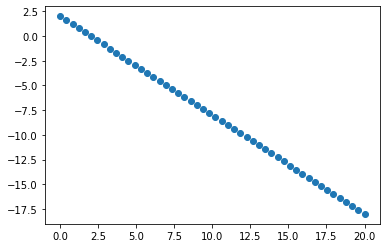

In [6]:
plt.scatter(X, Y)
# plt.plot(X, Y, marker = '.', linestyle ='none')

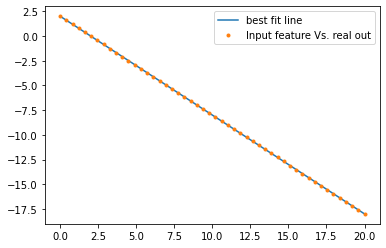

In [7]:
#find the best fit line theoratically 
a, b = np.polyfit(X, Y, 1)
x = X
y = (a*x) + b

plt.plot(x, y, label = 'best fit line')
plt.plot(X, Y, label = "Input feature Vs. real out", marker ='.', linestyle = 'none')
plt.legend()
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

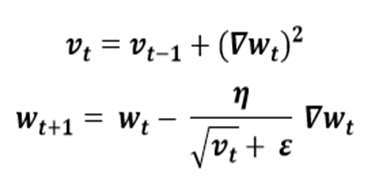

In [8]:
def GD_AdaGrad(X, Y, alpha, epsilon, num_iter):
    m = len(Y)
    
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    
    theta1 = 0
    theta0 = 0
    vt0 =0
    vt1 = 0
    
    
    for i in range(num_iter):
        # calculating model equation
        h = theta0 + (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        
        vt0 = vt0 + (gradient_theta0**2)
        vt1 = vt1 + (gradient_theta1**2)
        
        term0 = alpha / (np.sqrt(vt0) + epsilon)
        term1 = alpha / (np.sqrt(vt1) + epsilon)

#         term0 = alpha / math.sqrt(vt0 + epsilon) 
#         term1 = alpha / math.sqrt(vt1 + epsilon) 
        
        theta0 = theta0 - (term0 * gradient_theta0)
        theta1 = theta1 - (term1 * gradient_theta1)
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


In [9]:
alpha = 0.1
num_iter = 1000
epsilon = 0.00000001
cost_list_Adagrad, thetas0_Adagrad, thetas1_Adagrad, H_Adagrad = GD_AdaGrad(X, Y, alpha, epsilon, num_iter)
# print(cost_list)

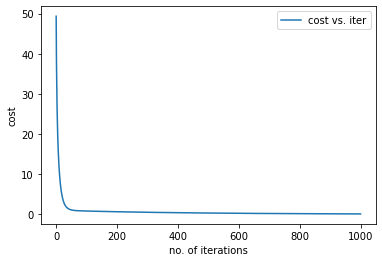

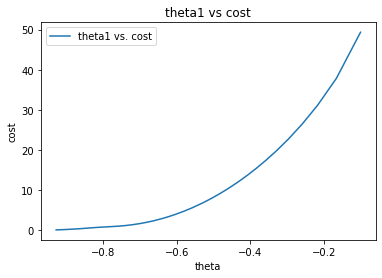

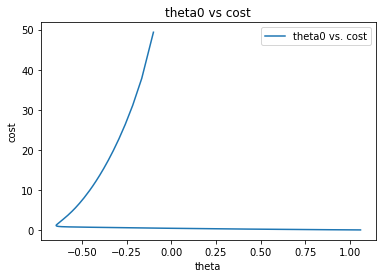

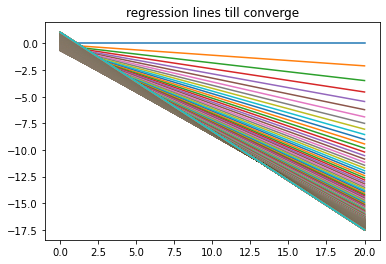

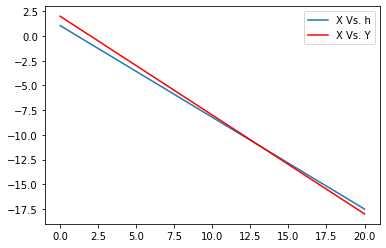

In [10]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adagrad)), cost_list_Adagrad, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adagrad, cost_list_Adagrad, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adagrad, cost_list_Adagrad, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adagrad:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adagrad[-1], label='X Vs. h')
plt.plot(X, Y, label='X Vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [39]:
mean_Adagrad = sum(Y) / len(Y)

ss_res_Adagrad = ((Y - H_Adagrad[-1])**2).sum()
ss_tot_Adagrad = ((Y - mean_Adagrad)**2).sum()

r2_Adagrad = 1 - (ss_res_Adagrad / ss_tot_Adagrad)

print(r2_Adagrad *100)

96.62976432125726


# playing with parameters (Adagrad)

In [ ]:
alpha = 0.0001
num_iter = 1000
epsilon = 0.0000001
cost_list_Adagrad, thetas0_Adagrad, thetas1_Adagrad, H_Adagrad = GD_AdaGrad(X, Y, alpha, epsilon, num_iter)
# print(cost_list)

In [ ]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adagrad)), cost_list_Adagrad, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adagrad, cost_list_Adagrad, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adagrad, cost_list_Adagrad, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adagrad:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adagrad[-1], label='X Vs. h')
plt.plot(X, Y, label='X Vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [ ]:
alpha = 0.5
num_iter = 1000
epsilon = 0.00000001
cost_list_Adagrad, thetas0_Adagrad, thetas1_Adagrad, H_Adagrad = GD_AdaGrad(X, Y, alpha, epsilon, num_iter)
# print(cost_list)

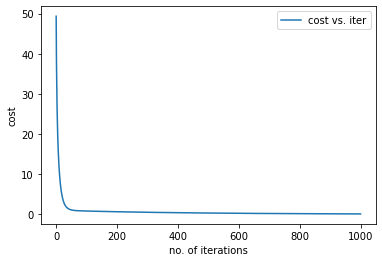

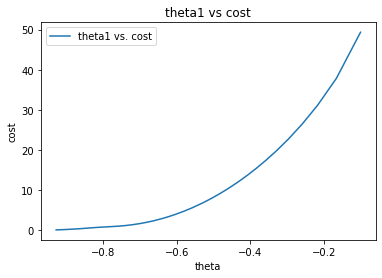

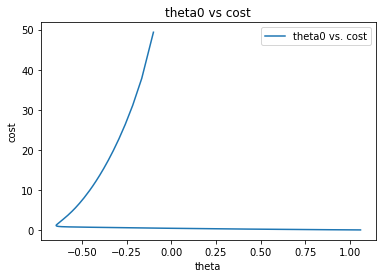

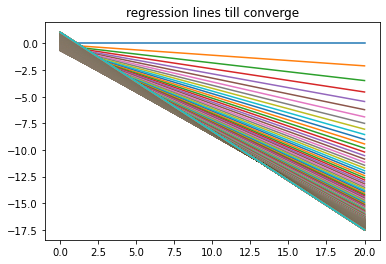

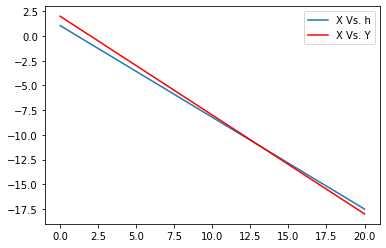

In [12]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adagrad)), cost_list_Adagrad, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adagrad, cost_list_Adagrad, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adagrad, cost_list_Adagrad, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adagrad:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adagrad[-1], label='X Vs. h')
plt.plot(X, Y, label='X Vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

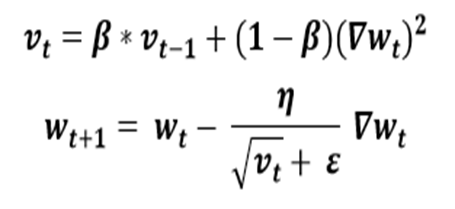

In [13]:
def GD_RMSprop(X, Y, alpha, epsilon, beta, num_iter):
    m = len(Y)
    
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    
    theta1 = 0
    theta0 = 0
    vt0 =0
    vt1 = 0
    
    
    for i in range(num_iter):
        # calculating model equation
        h = theta0+ (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        
        vt0 = (beta*vt0) + ((1-beta)*(gradient_theta0**2))
        vt1 = (beta*vt1) + ((1-beta)*(gradient_theta1**2))
        
        term0 = alpha / (np.sqrt(vt0) + epsilon)
        term1 = alpha / (np.sqrt(vt1) + epsilon)

#         term0 = alpha / math.sqrt(vt0 + epsilon) 
#         term1 = alpha / math.sqrt(vt1 + epsilon) 
        
        theta0 = theta0 - (term0 * gradient_theta0)
        theta1 = theta1 - (term1 * gradient_theta1)
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


In [14]:
alpha = 0.1
num_iter = 1000
epsilon = 0.00000001
beta = 0.7
cost_list_RMS, thetas0_RMS, thetas1_RMS, H_RMS = GD_RMSprop(X, Y, alpha, epsilon, beta, num_iter)
# print(cost_list)

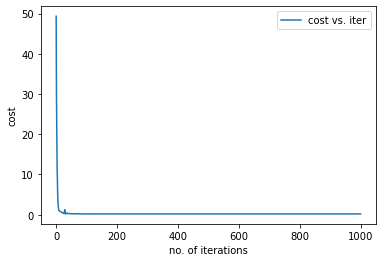

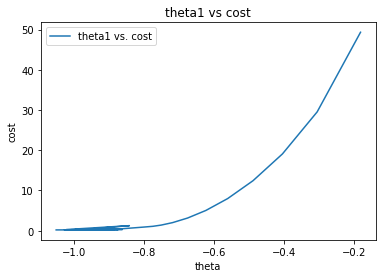

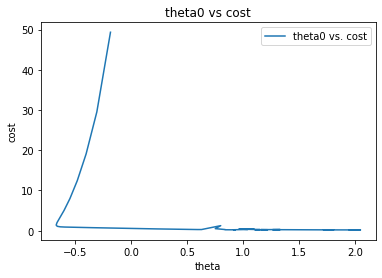

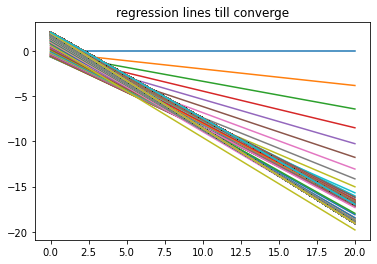

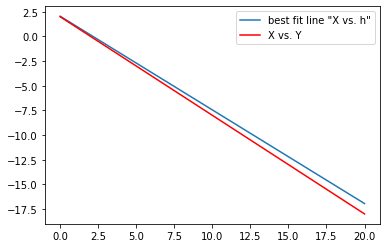

In [15]:

# plotting cost vs iter
plt.plot(range(len(cost_list_RMS)), cost_list_RMS, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_RMS, cost_list_RMS, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_RMS, cost_list_RMS, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_RMS:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_RMS[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [16]:
mean_RMS = sum(Y) / len(Y)

ss_res_RMS = ((Y - H_RMS[-1])**2).sum()
ss_tot_RMS = ((Y - mean_RMS)**2).sum()

r2_RMS = 1 - (ss_res_RMS / ss_tot_RMS)

print(r2_RMS*100)

98.87808824105882


# playing with parameters (RMSprop)

In [17]:
alpha = 0.001
num_iter = 1000
epsilon = 0.0001
beta = 0.9
cost_list_RMS, thetas0_RMS, thetas1_RMS, H_RMS = GD_RMSprop(X, Y, alpha, epsilon, beta, num_iter)
# print(cost_list)

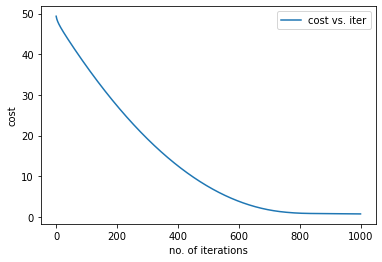

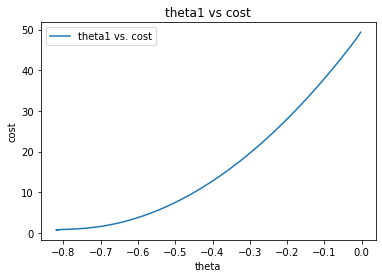

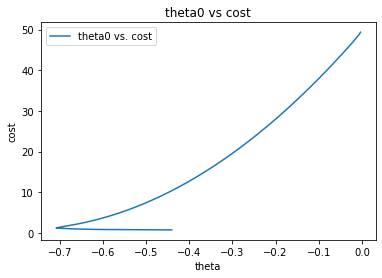

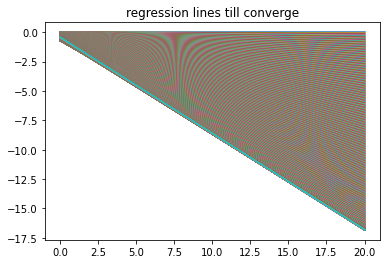

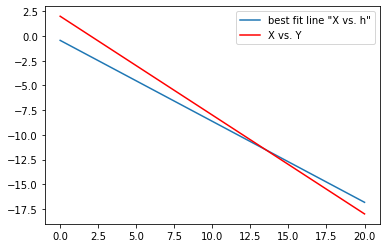

In [18]:

# plotting cost vs iter
plt.plot(range(len(cost_list_RMS)), cost_list_RMS, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_RMS, cost_list_RMS, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_RMS, cost_list_RMS, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_RMS:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_RMS[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [19]:
alpha = 0.9
num_iter = 1000
epsilon = 0.00000001
beta = 0.1
cost_list_RMS, thetas0_RMS, thetas1_RMS, H_RMS = GD_RMSprop(X, Y, alpha, epsilon, beta, num_iter)
# print(cost_list)

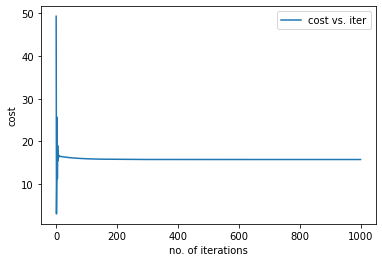

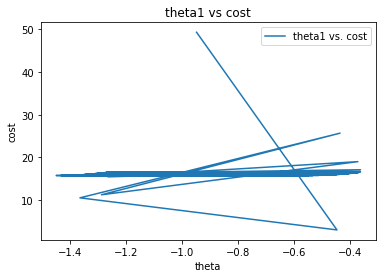

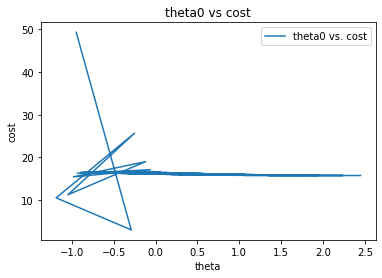

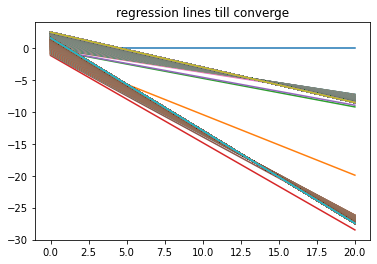

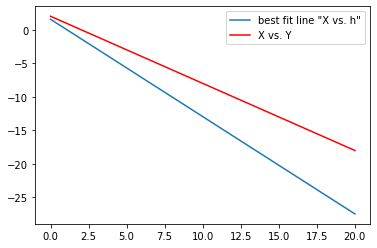

In [20]:

# plotting cost vs iter
plt.plot(range(len(cost_list_RMS)), cost_list_RMS, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_RMS, cost_list_RMS, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_RMS, cost_list_RMS, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_RMS:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_RMS[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

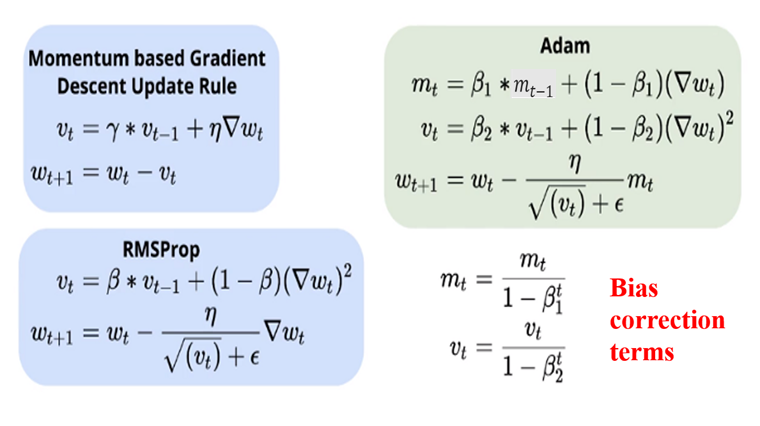

In [21]:
def GD_Adam(X, Y, alpha, epsilon, beta1, beta2, num_iter):
    m = len(Y)
    
    cost_list = []
    thetas0 = []
    thetas1= []
    Hs = []
    
    theta1 = 0
    theta0 = 0
    vt0 =0
    vt1 = 0
    mt0 = 0
    mt1 = 0
    
    for i in range(num_iter):
        # calculating model equation
        h = theta0+ (theta1*X)
        Hs.append(h)
        # calculating cost
        c = (h-Y)**2
        cost = (sum(c))/(2*m)
        #print(cost)
        cost_list.append(cost)


        # update theta
        gradient_theta0 = ((h-Y).sum())/m
        gradient_theta1 = (((h-Y)*X).sum())/m
        
        mt0 = (beta1*mt0) + ((1-beta1)*gradient_theta0)
        mt1 = (beta1*mt1) + ((1-beta1)*gradient_theta1)
        
        vt0 = (beta2*vt0) + ((1-beta2)*(gradient_theta0**2))
        vt1 = (beta2*vt1) + ((1-beta2)*(gradient_theta1**2))
        
        term0 = alpha / (np.sqrt(vt0) + epsilon)
        term1 = alpha / (np.sqrt(vt1) + epsilon)

        if i >= 1:
            mt0 = mt0 / (1-(beta1**i))
            mt1 = mt1 / (1-(beta1**i))
            
            vt0 = vt0 / (1-(beta2**i))
            vt1 = vt1 / (1-(beta2**i))
        
        theta0 = theta0 - (term0 * mt0)
        theta1 = theta1 - (term1 * mt1)
        #print( gradient_theta0)

        thetas0.append(theta0)
        thetas1.append(theta1)
        if cost<0.1:
            break
    return(cost_list, thetas0, thetas1, Hs)


In [22]:
alpha = 0.1
num_iter = 200
epsilon = 0.00000001
beta1 = 0.5
beta2 = 0.9
cost_list_Adam, thetas0_Adam, thetas1_Adam, H_Adam = GD_Adam(X, Y, alpha, epsilon, beta1, beta2, num_iter)
# print(cost_list)

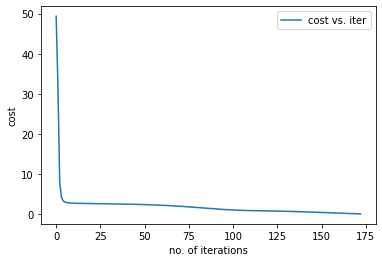

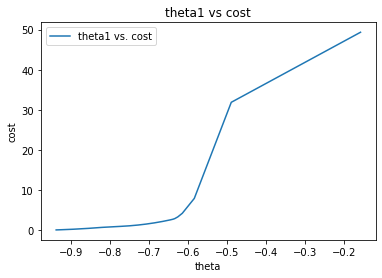

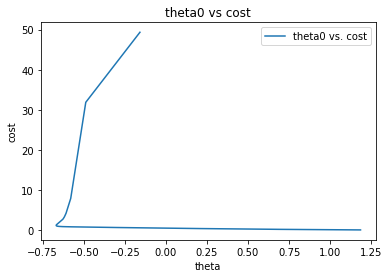

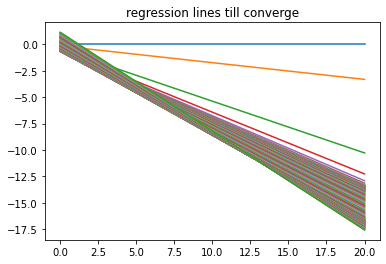

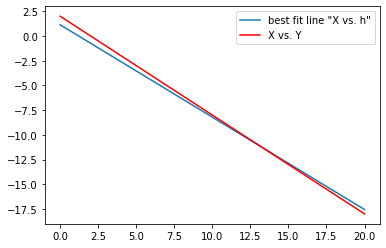

In [23]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adam)), cost_list_Adam, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adam, cost_list_Adam, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adam, cost_list_Adam, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adam:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adam[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [24]:
mean_Adam = sum(Y) / len(Y)

ss_res_Adam = ((Y - H_Adam[-1])**2).sum()
ss_tot_Adam = ((Y - mean_Adam)**2).sum()

r2_Adam = 1 - (ss_res_Adam / ss_tot_Adam)

print(r2_Adam)

0.9944641986275964


# playing with parameters (Adam)

In [25]:
alpha = 0.0001
num_iter = 250
epsilon = 0.0000001
beta1 = 0.9
beta2 = 0.999
cost_list_Adam, thetas0_Adam, thetas1_Adam, H_Adam = GD_Adam(X, Y, alpha, epsilon, beta1, beta2, num_iter)
# print(cost_list)

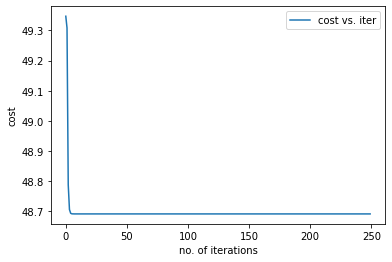

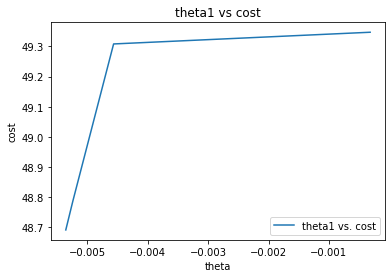

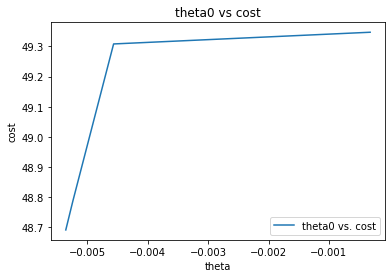

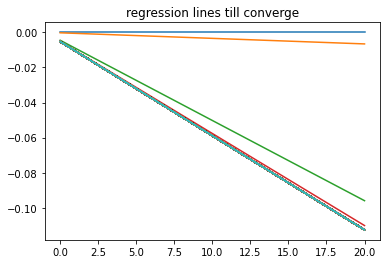

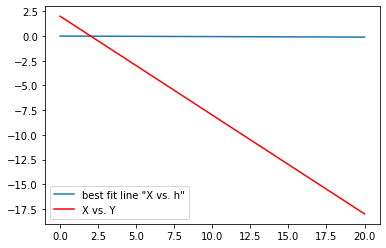

In [26]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adam)), cost_list_Adam, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adam, cost_list_Adam, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adam, cost_list_Adam, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adam:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adam[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

In [27]:
alpha = 0.1
num_iter = 200
epsilon = 0.00000001
beta1 = 0.7
beta2 = 0.2
cost_list_Adam, thetas0_Adam, thetas1_Adam, H_Adam = GD_Adam(X, Y, alpha, epsilon, beta1, beta2, num_iter)
# print(cost_list)

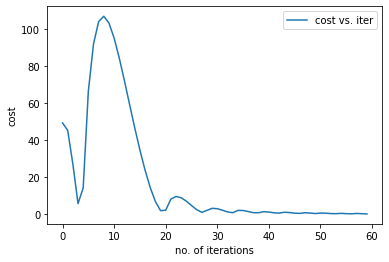

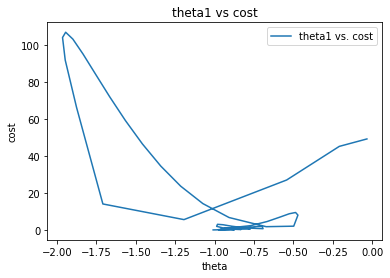

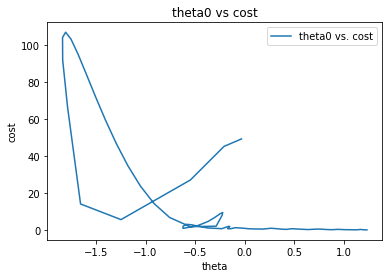

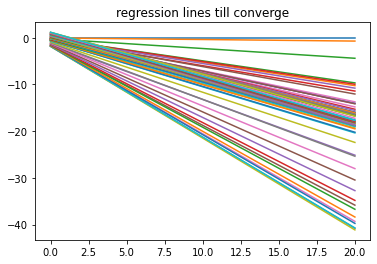

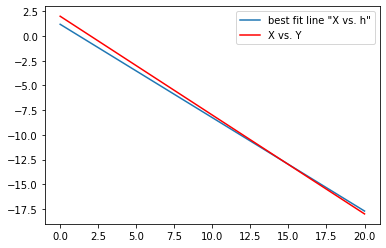

In [29]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adam)), cost_list_Adam, label = "cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost

plt.plot(thetas1_Adam, cost_list_Adam, label='theta1 vs. cost')
plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adam, cost_list_Adam, label='theta0 vs. cost')
plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()




for i in H_Adam:
    plt.plot(X, i)
plt.title('regression lines till converge')
#plt.legend()
plt.show()


plt.plot(X, H_Adam[-1], label='best fit line "X vs. h"')
plt.plot(X, Y, label='X vs. Y', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.legend()
plt.show()

# Adagrad, RMSprop, Adam (Comparison).

In [30]:
# parameters
alpha = 0.1
num_iter = 250
epsilon = 0.000000001
beta1 = 0.5
beta2 = 0.9

In [31]:
cost_list_Adagrad, thetas0_Adagrad, thetas1_Adagrad, H_Adagrad = GD_AdaGrad(X, Y, alpha, epsilon, num_iter)

In [32]:
cost_list_RMS, thetas0_RMS, thetas1_RMS, H_RMS = GD_RMSprop(X, Y, alpha, epsilon, beta1, num_iter)

In [33]:
cost_list_Adam, thetas0_Adam, thetas1_Adam, H_Adam = GD_Adam(X, Y, alpha, epsilon, beta1, beta2, num_iter)

# r2 for (Adagra, RMSprop, Adam)

In [35]:
mean_Adagrad = sum(Y) / len(Y)

ss_res_Adagrad = ((Y - H_Adagrad[-1])**2).sum()
ss_tot_Adagrad = ((Y - mean_Adagrad)**2).sum()

r2_Adagrad = 1 - (ss_res_Adagrad / ss_tot_Adagrad)


In [36]:
mean_RMS = sum(Y) / len(Y)

ss_res_RMS = ((Y - H_RMS[-1])**2).sum()
ss_tot_RMS = ((Y - mean_RMS)**2).sum()

r2_RMS = 1 - (ss_res_RMS / ss_tot_RMS)

In [37]:
mean_Adam = sum(Y) / len(Y)

ss_res_Adam = ((Y - H_Adam[-1])**2).sum()
ss_tot_Adam = ((Y - mean_Adam)**2).sum()

r2_Adam = 1 - (ss_res_Adam / ss_tot_Adam)

In [38]:
print("r2 values are:\n", "Adagrad: ", r2_Adagrad, "\n", "RMSprop: ", r2_RMS, "\n", "Adam: ", r2_Adam)

r2 values are:
 Adagrad:  0.9662976432125725 
 RMSprop:  0.9887808515905302 
 Adam:  0.9944641987608543


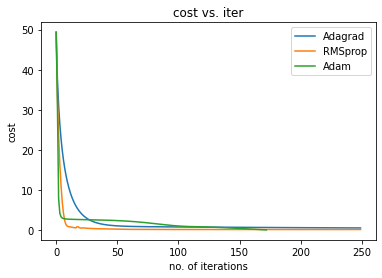

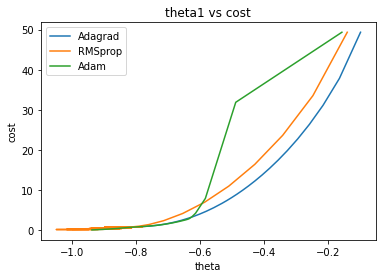

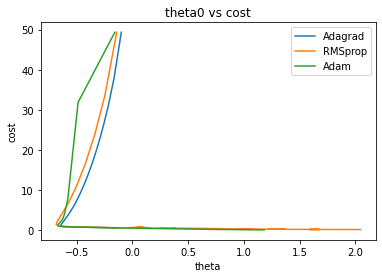

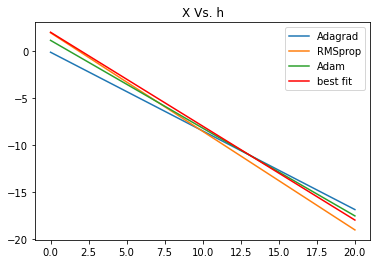

In [40]:

# plotting cost vs iter
plt.plot(range(len(cost_list_Adagrad)), cost_list_Adagrad, label = "Adagrad" )
plt.plot(range(len(cost_list_RMS)), cost_list_RMS, label = "RMSprop")
plt.plot(range(len(cost_list_Adam)), cost_list_Adam, label = "Adam")


plt.title("cost vs. iter")
plt.xlabel("no. of iterations")
plt.ylabel("cost")
plt.legend()
plt.show()


# plotting thetas vs cost
plt.plot(thetas1_Adagrad, cost_list_Adagrad, label="Adagrad")
plt.plot(thetas1_RMS, cost_list_RMS, label="RMSprop")
plt.plot(thetas1_Adam, cost_list_Adam, label="Adam")

plt.title('theta1 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()

plt.plot(thetas0_Adagrad, cost_list_Adagrad, label="Adagrad")
plt.plot(thetas0_RMS, cost_list_RMS, label="RMSprop")
plt.plot(thetas0_Adam, cost_list_Adam, label="Adam")

plt.title('theta0 vs cost')
plt.xlabel("theta")
plt.ylabel("cost")
plt.legend()
plt.show()


plt.plot(X, H_Adagrad[-1], label= "Adagrad")
plt.plot(X, H_RMS[-1], label="RMSprop")
plt.plot(X, H_Adam[-1], label="Adam")

plt.plot(X, Y, label='best fit', color = "red")
# plt.scatter(X, Y, label='X vs. Y', color = "red")
plt.title("X Vs. h")
plt.legend()
plt.show()

## Congratulations 
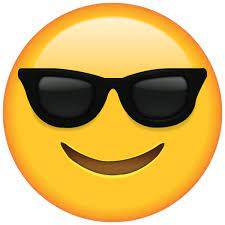